# Network Analysis
Network (graph) analysis is a burgeoning field of data analytics that seeks to draw insights from datasets that are inherently organized into network (graph) structures of relationships between actors.  As processing power increases and social networks become ubiquitous in the internet age, network analysis becomes vital to many different verticals.

In this notebook we'll check out some principles of network analysis with python and get to know a common package for python network analysis, [Networkx](https://networkx.github.io/).  While Networkx isn't perfect (especially performane-wise), it's nice because it has a quick learning curve and a good amount of common graph algorithms pre-packaged to go with simple python syntax.  The 3 parts of this notebook will address the following:
- Implementing a toy network and some simple network manipulations via python dictionaries
- Implementing and visualizing some basic Networkx manipulations on another manually created network
- Using Networkx to explore a dataset of citation data which has an inherent network of connected research papers

## Datasets
- [Citation Dataset](http://snap.stanford.edu/data/cit-HepTh.html)

## Learning Goals
- Understanding the basic concepts of how networks might be implemented in python data structures by using python dicts
- Understanding the basic functionality of Networkx in creating, manipulating, and analyzing network data
- Using Networkx to analyze a large dataset of citation data related by a network structure

## Simple Networks with Python Dicts
For the first exercise, let's try implementing a simple network and some basic path algorithms via [***adjacency lists***](https://en.wikipedia.org/wiki/Adjacency_list) with python dicts.

Here are the directed edge relations:  
    A -> B  
    A -> C  
    B -> C  
    B -> D  
    C -> D  
    D -> C  
    E -> F  
    F -> C  
    
First, implement this graph as a dictionary called `graph`:

In [82]:
graph = {}
graph['A'] = ['B', 'C']
graph['B'] = ['C', 'D']
graph['C'] = ['D']
graph['D'] = ['C']
graph['E'] = ['F']
graph['F'] = ['C']

### Path-Finding Algorithms
The next thing we're going to implement are a few path-finding algorithms that find paths between a given start and end node for a given graph.  The first algorithm takes a simple approach to find a path.  The second finds all paths.  And the third finds the shortest path.

Complete the first function to find any path between a given start node and end node.

In [83]:
## Find a path (not necessarily optimal) via depth-first search
def find_path(graph, start, end, path=[]):
    ## TODO: Add the starting node to the path
    path = path + [start]
    ## TODO: Handle if start == end
    if start == end:
        print path
        return path
    ## TODO: Handle if start or end doesn't exist in graph by returning None
    if not graph.has_key(start) or (not graph.has_key(end)):
        return None
    ## TODO: Recursively traverse paths as far as possible starting from start so as to find a path via depth-first search
    for node in graph[start]:
        ## TODO: if node isn't in the path yet, try going to it
        if node not in path:
            ## TODO: check if the recursive call to find_path returns a non-null result, if so, return that
            new_path = find_path(graph, node, end, path)
            if new_path:
                print path
                return new_path
    ## Return None if no path exists
    return None

Test your `find_path` function on A -> D and make sure it returns a path that makes sense.  Try a few others if you like.

In [84]:
find_path(graph, 'A', 'D')

['A', 'B', 'C', 'D']
['A', 'B', 'C']
['A', 'B']
['A']


['A', 'B', 'C', 'D']

Now try completing the similar `find_all_paths` function below to find all possible (non-cyclical) paths between the starting and ending node.

In [45]:
## Find all possible paths between start and finish
def find_all_paths(graph, start, end, path=[]):
    ## TODO: Add the starting node to the path
    path = path + [start]
    ## TODO: Handle if start == end
    if start == end:
        return [path]
    ## TODO: Handle if start or end doesn't exist in graph
    if not graph.has_key(start) or not graph.has_key(end):
        return None
    paths = []
    ## TODO: Implement all paths algorithm (recursive again)
    for node in graph[start]:
        ## TODO: Implement all paths algorithm
        if node not in path:
            newpaths = find_all_paths(graph, node, end, path)
            if newpaths: paths += newpaths
            ##for newpath in newpaths:
            ##    paths.append(newpath)
    return paths

Test your `find_all_paths` function with A -> D.

In [46]:
find_all_paths(graph, 'A', 'D')

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'D']]

Now try combining similar concepts to generate a `find_shortest_path` function.

In [47]:
## Find shortest path between start and finish
def find_shortest_path(graph, start, end, path=[]):
    # TODO: Add the starting node to the path
    path = path + [start]
    # TODO: Handle if start=end
    if start == end:
        return path
    ## TODO: Handle if either start or end isn't in graph
    if not graph.has_key(start) or not graph.has_key(end):
        return None
    ## Instantiate shortest path to None
    shortest = None
    ## TODO: Loop through different possible paths from start, at the end return shortest
    for node in graph[start]:
        ## TODO: If it's a new node, check it out
        if node not in path:
            ## TODO: Recursively call to this function
            newpath = find_shortest_path(graph, node, end, path)
            ## TODO: If we find a path...
            if newpath:
                ## TODO: Check if shortest is null or the found path is shorter than shortest, if either then set shortest to the found path
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
    return shortest

Test your `find_shortest_path` function on A -> D.

In [48]:
find_shortest_path(graph, 'A', 'D')

['A', 'B', 'D']

## Networks in Networkx
Now we're going to get to know Networkx.  [NetworkX](http://networkx.github.io/) is a pure-Python pakcage for graph analysis.  Its performance is not the best (see references).  However it has easier learning curve and has better development efficiency.

### Install Networkx

```
sudo pip install --user  networkx
```

Set up the imports and make sure everything works properly.

In [8]:
from matplotlib import pyplot as plt
import networkx as nx
%matplotlib inline

Here's a cool little utility function that we're going to use to visualize our network graphs as we manipulate them with Networkx.

In [49]:
# A cool utility function for us to explore graph creation process
def visualize_graph(G, pos=None, return_internals=False):
    # ignore it, we'll come back later
    if pos is None:
        pos = pos=nx.spring_layout(G)
    nx.draw(G, pos)
    _mute = nx.draw_networkx_nodes(G, pos, node_color='#ccccff')
    _mute = nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    labels = dict((n,n) for n in G.nodes())
    _mute = nx.draw_networkx_labels(G, pos, labels=labels)
    edge_labels = {}
    for e in G.edges():
        edge_labels[e] = ','.join(['%s=%s' % (k,v) for (k, v) in G[e[0]][e[1]].items()])
    _mute = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if return_internals:
        return pos, labels, edge_labels

### Creating a Graph with Networkx
First create a Networkx Graph object called `G` by a call to [`nx.Graph()`](https://networkx.github.io/documentation/latest/reference/classes.graph.html#networkx.Graph).

In [50]:
# Create graph
G = nx.Graph()

Now let's add a single node to the graph whose label is 1 by a call to the [`add_node()`](http://networkx.lanl.gov/reference/generated/networkx.MultiGraph.add_node.html) function on `G`.  After adding your node, call `visualize_graph` to check out your graph.

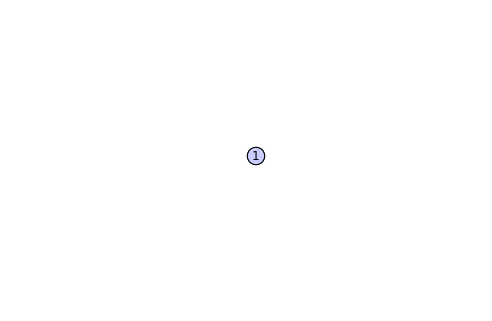

In [51]:
# Add single node
G.add_node(1)
# Visualize the graph
visualize_graph(G)

Now use the [`add_nodes_from()`](http://networkx.lanl.gov/reference/generated/networkx.MultiGraph.add_nodes_from.html#networkx.MultiGraph.add_nodes_from) function to add 2 nodes to your graph with labels 2 and 3.  Call `visualize_graph` to check out the current graph.

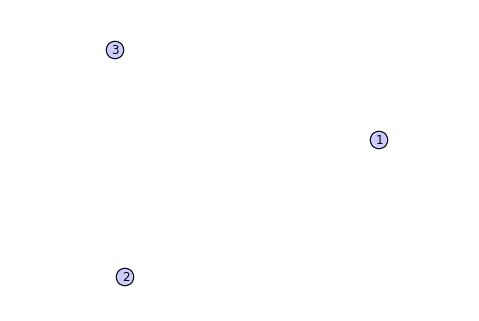

In [52]:
# Add list of node
G.add_nodes_from([2,3])
# Visualize the graph
visualize_graph(G)

Now let's try adding nodes with non-integer labels.  Node labels can be any python hashable type.  Here we'll try strings, use `add_nodes_from` to add nodes u and v and then visualize your graph.

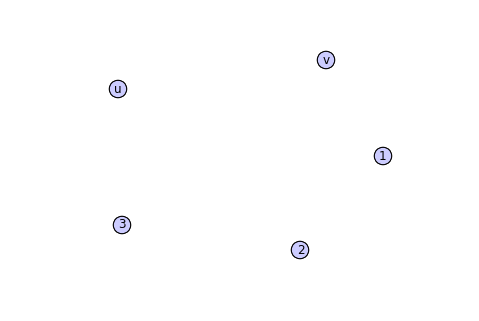

In [53]:
# Nodes can be any (hashable) type
G.add_nodes_from(['u', 'v'])
# Visualize the graph
visualize_graph(G)

Let's try removing nodes.  Use [`remove_node()`](http://networkx.lanl.gov/reference/generated/networkx.MultiGraph.remove_node.html) to remove the u node from your graph and then visualize your graph.

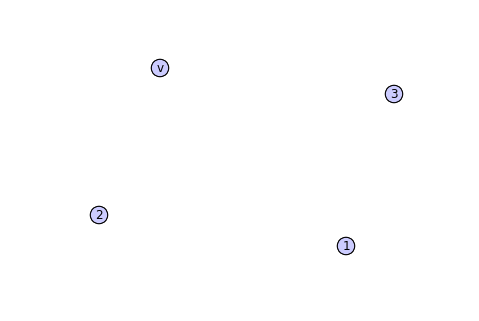

In [54]:
# Remove node
G.remove_node('u')
# Visualize Graph
visualize_graph(G)

Finally now let's start making an actual graph by adding some edges (relationships).  Add an edge between nodes 1 and 2 by using [`add_edge()`](http://networkx.lanl.gov/reference/generated/networkx.DiGraph.add_edge.html?highlight=add_edge#networkx.DiGraph.add_edge) and then visualize your graph.

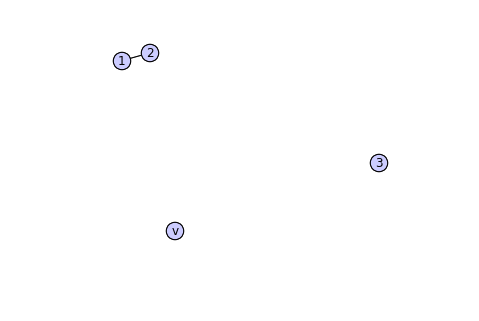

In [55]:
# Add edge between 1 and 2
G.add_edge(1, 2)
# Visualize your graph
visualize_graph(G)

Now let's add multiple edges at once, use [`add_edges_from()`](http://networkx.lanl.gov/reference/generated/networkx.DiGraph.add_edges_from.html) to add edges between 2 and 3 and between 1 and v, then visualize your graph.

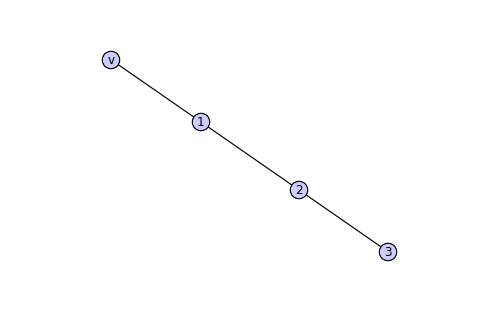

In [56]:
# Add edges
G.add_edges_from([(2, 3), (1, 'v')])
# Visualize graph
visualize_graph(G)

Now let's try using some of the basic summary functions to get some summary statistics about our graph.  Try the following:
- Use [`nodes()`]() to print the nodes in the graph
- Use [`edges()`]() to print the edges in the graph
- Use [`number_of_nodes()`]() to print the number of nodes in the graph
- Use [`number_of_edges()`]() to print the number of edges in the graph
- Use [`neighbors()`]() to print the adjacency list of node 1
- Use [`adjacency_list()`]() to print the adjacency lists of all nodes

In [57]:
# Print nodes
print G.nodes()
# Print edges
print G.edges()
# Print number of nodes
print G.number_of_nodes()
# Print number of edges
print G.number_of_edges()
# Print the adjacency list of node 1
print G.neighbors(1)
# Print the adjacency list of all nodes
print G.adjacency_list()

[1, 2, 3, 'v']
[(1, 2), (1, 'v'), (2, 3)]
4
3
[2, 'v']
[[2, 'v'], [1, 3], [2], [1]]


The adjacency list is not very useful without knowing which node each corresponds to, so let's try to retrieve that.  Here's one way to do it.

In [58]:
# The adjacency_list() is not very useful without knowing the vertex
print G.nodes()
# Combine vertex label and adjacency_list
print dict(zip(G.nodes(), G.adjacency_list()))

[1, 2, 3, 'v']
{1: [2, 'v'], 2: [1, 3], 3: [2], 'v': [1]}


We can also get this information with a call to `nx.to_dict_of_dicts(G)`.  Try this out and make sure you understand the output.  Then print out `G.edge`, you should see the same thing.  This is because this is how networkx stores networks internally (dict of dicts).  Can you tell what's happening with this structure?  How does it match up with the exercise you implemented earlier?

In [59]:
# Equivalent information can be gotten by to_dict_of_dicts:
print nx.to_dict_of_dicts(G)
# Equivalent information can also be gotten by edge:
print G.edge

{1: {2: {}, 'v': {}}, 2: {1: {}, 3: {}}, 3: {2: {}}, 'v': {1: {}}}
{1: {2: {}, 'v': {}}, 2: {1: {}, 3: {}}, 3: {2: {}}, 'v': {1: {}}}


Up to now, you already have an idea of how to create a `Graph`.
It is undirected graph.
To create a directed graph, you use `DiGraph`.
The operations are similar.

**EXERCISE**:
Build a `DiGraph`

**EXERCISE**:
Build a [`MultiGraph`](http://networkx.lanl.gov/reference/classes.multigraph.html?highlight=multigraph#networkx.MultiGraph)

Since `G` is a `dict` of `dict` we can operate on it as such.  Try calling `G[1]` and `G[1][2]` and make sure the results make sense to you.

In [60]:
# Check out G[1] and G[1][2]
print G[1]
print G[1][2]

{2: {}, 'v': {}}
{}


As you may have noticed, there's a second level to these dictionaries.  This is where we can store attributes on our edges.  Let's try doing that by storing the attribute 'color'='blue' for the 1 -> 2 edge with basic python dict syntax, then visualize your graph.

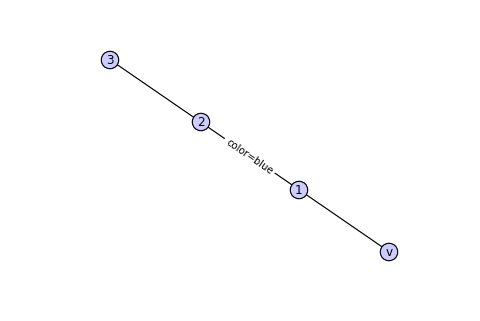

In [61]:
# Set edge attribute
G[1][2]['color'] = 'blue'
# Visualize your graph
visualize_graph(G)

Try adding an edge between 1 and 3 with `add_edge` by specifying the dict for 'color'='red' directly in your call, then visualize your graph.

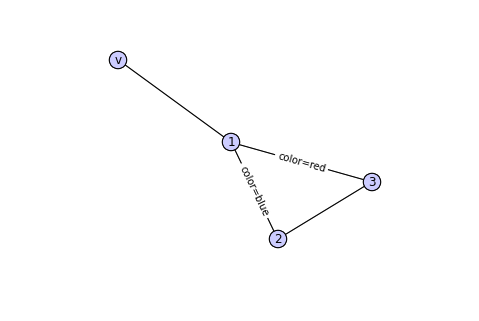

In [62]:
# Add the edge between 1 and 3 with the attributes dict setting color to red
G.add_edge( 1, 3, {'color': 'red'})
# Visualize your graph
visualize_graph(G)

#### Iterating through Nodes
Let's try iterating through nodes, use [`nodes_iter()`](http://networkx.lanl.gov/reference/generated/networkx.Graph.nodes_iter.html?highlight=nodes_iter#networkx.Graph.nodes_iter) to print out every node in your graph.

In [63]:
# Iteration of nodes
for n in G.nodes_iter():
    print n

1
2
3
v


#### Iterating through Edges
Now let's try iterating through edges but this time with a catch.  For those edges that don't have a color attribute already give them the color attribute 'not sure' via the following steps:
- print 'Before: ' + the result of `nx.to_dict_of_dicts()`
- Visualize the before graph
- Step through the adjacency lists with a call to `adjacency_iter()`
- For each one, if the edge dict doesn't contain the key 'color', add it with the value 'not sure'
- print 'After: ' + `nx.to_dict_of_dicts()`
- Call `plt.figure()`
- Visualize the after graph

Before: {1: {2: {'color': 'blue'}, 3: {'color': 'red'}, 'v': {}}, 2: {1: {'color': 'blue'}, 3: {}}, 3: {1: {'color': 'red'}, 2: {}}, 'v': {1: {}}}
After: {1: {2: {'color': 'blue'}, 3: {'color': 'red'}, 'v': {'color': 'not sure'}}, 2: {1: {'color': 'blue'}, 3: {'color': 'not sure'}}, 3: {1: {'color': 'red'}, 2: {'color': 'not sure'}}, 'v': {1: {'color': 'not sure'}}}


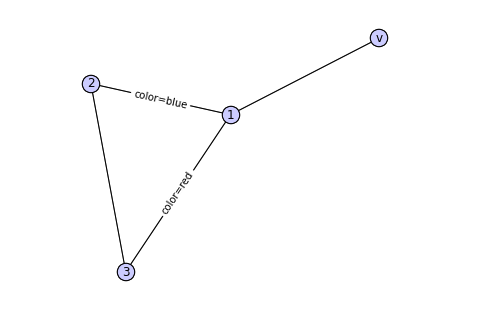

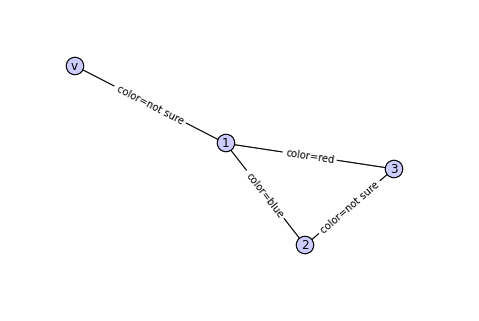

In [64]:
# Iteration of edges
print 'Before:', nx.to_dict_of_dicts(G)
visualize_graph(G)
for n,nbrs in G.adjacency_iter():
    for nbr,eattr in nbrs.items():
        if not 'color' in eattr:
            eattr['color'] = 'not sure'
print 'After:', nx.to_dict_of_dicts(G)
plt.figure()
visualize_graph(G)

#### Graph Attributes
Graph attributes can be useful for storing metadata information about your graph.  First print `G.graph`, then set `G.graph`'s 'name' to 'My Test Graph', then print it out again.

In [65]:
# Graph attributes are useful to store meta information
# e.g. name, size, where did you get it, ... 
print G.graph
G.graph['name'] = 'My Test Graph'
print G.graph

{}
{'name': 'My Test Graph'}


Nodes can also have their own metadata.  Try setting the name of node 1 to 'Node 1'.

In [66]:
# We already see that edge can have attributes
# Nodes can also have attributes.
print G.node
print G.node[1]
G.node[1]['name'] = 'Node 1'
print G.node[1]

{1: {}, 2: {}, 3: {}, 'v': {}}
{}
{'name': 'Node 1'}


### Generate a Test Graph
In this course, we care more about real graphs.
Sometimes, you may want to automatically generate some synthetic graphs.
Different random graphs are used in research.
[Further reading](http://networkx.github.io/documentation/latest/tutorial/tutorial.html#graph-generators-and-graph-operations)
on NetworkX's built-in graph generation methods.

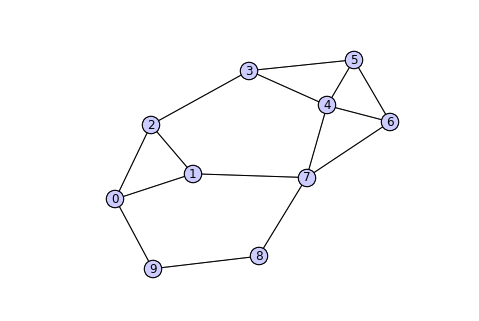

In [67]:
# Generated by the following method
# We fix one sample in this notebook to make easier for illustration
#G = nx.newman_watts_strogatz_graph(10,2, 0.2)
#_ = visualize_graph(G)
#nx.to_dict_of_dicts(G)

G = nx.from_dict_of_dicts({0: {1: {}, 2: {}, 9: {}},
 1: {0: {}, 2: {}, 7: {}},
 2: {0: {}, 1: {}, 3: {}},
 3: {2: {}, 4: {}, 5: {}},
 4: {3: {}, 5: {}, 6: {}, 7: {}},
 5: {3: {}, 4: {}, 6: {}},
 6: {4: {}, 5: {}, 7: {}},
 7: {1: {}, 4: {}, 6: {}, 8: {}},
 8: {7: {}, 9: {}},
 9: {0: {}, 8: {}}})
visualize_graph(G)

**EXERCISE**: Try other graph generators

```
>>> er=nx.erdos_renyi_graph(100,0.15)
>>> ws=nx.watts_strogatz_graph(30,3,0.1)
>>> ba=nx.barabasi_albert_graph(100,5)
>>> red=nx.random_lobster(100,0.9,0.9)
```

### Centrality measures

[Centrality](http://en.wikipedia.org/wiki/Centrality) is a classical concept in graph analysis.
It measures the "importance" of nodes.
The notions of "importance" are different.

We only provide some samples in following sections.

**EXERCISE**: 
Refer to the [documentation](http://networkx.github.io/documentation/latest/reference/algorithms.centrality.html)
and online resources to understand those centrality measures.
Try other centrality measures that are not covered in this tutorial.
What interesting findings can you get?

For your test graph from above, what are the top 5 nodes in terms of [`degree_centrality()`](http://networkx.lanl.gov/reference/generated/networkx.algorithms.centrality.degree_centrality.html?highlight=degree_centrality#networkx.algorithms.centrality.degree_centrality)?

In [68]:
import heapq

def top_items(G, centrality):
    nodes = heapq.nlargest(5, centrality, key=lambda n: centrality[n])
    for n in nodes:
        print n, centrality[n]

For your test graph from above, what are the top 5 nodes in terms of [`closeness_centrality()`](http://networkx.lanl.gov/reference/generated/networkx.algorithms.centrality.closeness_centrality.html?highlight=closeness_centrality#networkx.algorithms.centrality.closeness_centrality)?

In [69]:
top_items(G, nx.closeness_centrality(G))

7 0.642857142857
1 0.5625
4 0.5625
2 0.529411764706
3 0.529411764706


For your test graph from above, what are the top 5 nodes in terms of [`betweenness_centrality()`](http://networkx.lanl.gov/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html?highlight=closeness_centrality#networkx.algorithms.centrality.betweenness_centrality)?

In [70]:
top_items(G, nx.betweenness_centrality(G))

7 0.351851851852
2 0.143518518519
3 0.134259259259
4 0.125
1 0.12037037037


For your test graph from above, what are the top 5 nodes in terms of [`eigenvector_centrality()`](http://networkx.lanl.gov/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html?highlight=closeness_centrality#networkx.algorithms.centrality.eigenvector_centrality)?

In [71]:
top_items(G, nx.eigenvector_centrality(G))

4 0.4706600675
7 0.40080652981
6 0.389234819432
5 0.375300434544
3 0.342241027193


Can you explain conceptually the results you've seen from these different measures?

#### PageRank

[PageRank](https://en.wikipedia.org/wiki/PageRank) is widely used in ranking web pages. The higher PR value the higher quality (cited by high quality sources).  Which are the top in [`pagerank()`](http://networkx.lanl.gov/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html?highlight=pagerank#networkx.algorithms.link_analysis.pagerank_alg.pagerank)?

In [72]:
top_items(G, nx.pagerank(G))

7 0.12899624251
4 0.124458221841
0 0.104479318212
2 0.100632576134
1 0.100526734191


#### Shortest Path

Note, this graph is generated from voting records.
In real life, probably they all know each other.  Find the [`shortest_path()`](http://networkx.lanl.gov/reference/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html?highlight=shortest_path) between nodes 9 and 5 and store it as `sp` to run the following visualization.

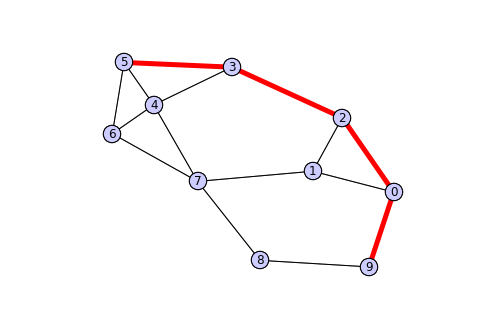

In [73]:
# Some random test to show you the usage
sp = nx.shortest_path(G, 9, 5)
pos, labels, edge_labels = visualize_graph(G, return_internals=True)
nx.draw_networkx_edges(G, 
                       pos,
                       edgelist=zip(sp[:-1], sp[1:]),
                       width=5,
                       edge_color='r'
                      )

#### Connected Components
Connected components represent the different independent subsets of a network.  Add nodes i and j to your network and then create an edge between them.  Then print the [`connected_components()`](http://networkx.lanl.gov/reference/generated/networkx.algorithms.components.connected.connected_components.html?highlight=connected_components#networkx.algorithms.components.connected.connected_components) of your graph (there should be 2 separate ones) and visualize your graph.  Do you understand what's going on here?

[set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), set(['i', 'j'])]


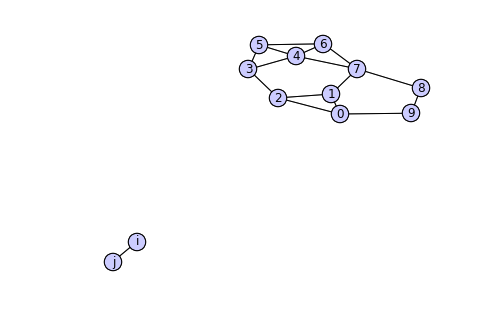

In [74]:
G.add_node('i') # isolated
G.add_node('j')
G.add_edge('i', 'j')
print list(nx.connected_components(G))
visualize_graph(G)

#### More Graph Algorithms

See the list of networkx: http://networkx.lanl.gov/reference/algorithms.html

#### Visualisation

`spring_layout` is force-directed graph layout.

* Attractive force along edges via Hooke's Law.
* Repulsive force between all vertices via Coulomb's Law.

Simulate the physical process to yield a stable layout.

* Wiki http://en.wikipedia.org/wiki/Force-directed_graph_drawing
* A demo video: https://www.youtube.com/watch?v=HQBMfozLa4Y

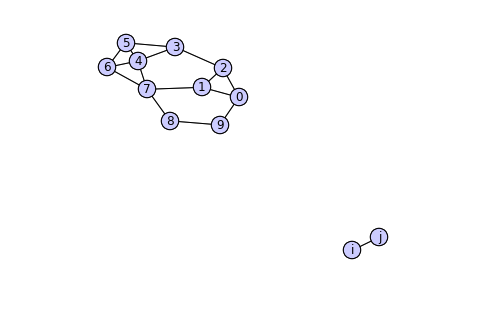

In [75]:
visualize_graph(G, pos=nx.spring_layout(G))

`spectral_layout` runs eigen value decomposition on the graph Laplacian.

$L = D - A$, where $D$ is degree matrix and $A$ is adjacency matrix.

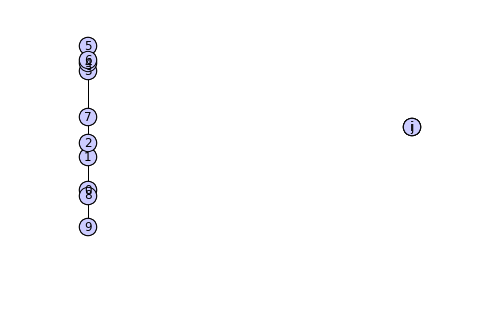

In [76]:
visualize_graph(G, pos=nx.spectral_layout(G))

`random_layout`... The name explains everything

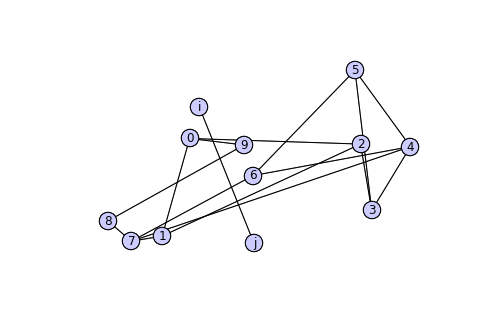

In [77]:
visualize_graph(G, pos=nx.random_layout(G))

## Networkx on a Real-World Dataset
Now that you should have a good feel for operating in Networkx, let's play around with it on the citation dataset found [here](http://snap.stanford.edu/data/cit-HepTh.html).

### Read in the Data
Read in the citation data into a graph `citations` by using [`read_edgelist()`](https://networkx.github.io/documentation/latest/reference/generated/networkx.readwrite.edgelist.read_edgelist.html) (make sure to specify a delimiter!).

In [38]:
citations = nx.read_edgelist('../Data/citations.txt', delimiter='\t')
# Print out the nodes to make sure it worked
citations.nodes()

[u'9305019',
 u'9305018',
 u'9305012',
 u'9305011',
 u'9305010',
 u'9305017',
 u'9305016',
 u'9305015',
 u'9305014',
 u'12019',
 u'12018',
 u'12015',
 u'12014',
 u'12017',
 u'12016',
 u'12011',
 u'12010',
 u'12013',
 u'12012',
 u'9252',
 u'9250',
 u'9251',
 u'9802059',
 u'9802053',
 u'9802052',
 u'9802051',
 u'9802050',
 u'9802057',
 u'9802056',
 u'9802055',
 u'9802054',
 u'9410115',
 u'9410114',
 u'9410117',
 u'9410116',
 u'9410111',
 u'9410110',
 u'9410113',
 u'9410112',
 u'1177',
 u'1176',
 u'1175',
 u'1174',
 u'1173',
 u'1172',
 u'1171',
 u'1170',
 u'1179',
 u'1178',
 u'303231',
 u'303230',
 u'303233',
 u'303232',
 u'303235',
 u'303234',
 u'303237',
 u'303236',
 u'303239',
 u'303238',
 u'9907013',
 u'9907012',
 u'9907011',
 u'9907017',
 u'9907016',
 u'9907015',
 u'9907014',
 u'9907019',
 u'9907018',
 u'9403188',
 u'9403189',
 u'9409128',
 u'9409126',
 u'9403183',
 u'9403180',
 u'9403181',
 u'9403186',
 u'9403187',
 u'9403184',
 u'9403185',
 u'9301031',
 u'9301030',
 u'9301033',
 u'

### Analyzing the Network
Print out the neighbors of node '1001'.

In [78]:
citations['1001'].keys()

[u'9905036',
 u'9508094',
 u'9609070',
 u'9609071',
 u'9910268',
 u'9505162',
 u'9705104',
 u'9706005',
 u'104044',
 u'9705220',
 u'7195',
 u'9608086',
 u'9703082',
 u'9511171',
 u'5068',
 u'9404151',
 u'9602114',
 u'9703166',
 u'9606040',
 u'9609239',
 u'112101',
 u'9705044',
 u'9811217',
 u'9704097',
 u'9910248',
 u'9311042',
 u'9309097',
 u'9702094',
 u'9505105',
 u'9506144',
 u'9407087',
 u'9701162',
 u'9510142',
 u'9907041',
 u'9910238',
 u'9711036',
 u'9702198',
 u'9505054',
 u'9503124',
 u'9408099',
 u'209230',
 u'9712028',
 u'9605184',
 u'9603003',
 u'9304045',
 u'9908007',
 u'9603161',
 u'9507158',
 u'9602022',
 u'9603150',
 u'212114',
 u'9308122',
 u'9806094',
 u'9805206',
 u'9606017',
 u'9909229',
 u'9711104',
 u'9802194',
 u'9607163',
 u'9511030',
 u'9501030',
 u'9805056',
 u'9601108',
 u'9507050',
 u'9707042',
 u'9712042',
 u'105207',
 u'9908144',
 u'9707049',
 u'9510234',
 u'9810188',
 u'7170',
 u'9605222',
 u'9506048',
 u'212223',
 u'9508155',
 u'9504090',
 u'11075',
 u'

Print out the top 20 nodes in terms of whatever centrality measures you like.

In [79]:
centrality = nx.degree_centrality(citations)
nodes = heapq.nlargest(20, centrality, key=lambda n: centrality[n])
print nodes

[u'9711200', u'9802150', u'9802109', u'9905111', u'9407087', u'9610043', u'9908142', u'9510017', u'9503124', u'9906064', u'9408099', u'9711162', u'9510209', u'9510135', u'9410167', u'9611050', u'9601029', u'9602022', u'9803131', u'9603142']


For the top 20 nodes in terms of your centrality, let's explore visually...

First use subgraph to create a graph of only the top 20 nodes from the original graph.  

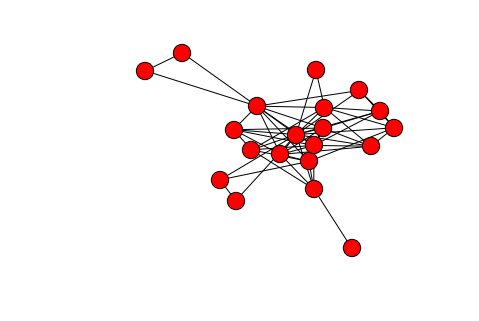

In [80]:
sub_citations = citations.subgraph(nodes)
nx.draw(sub_citations)

Exploration time, try creating subgraphs of some of the top nodes and their neighbors.  Maybe try out any algorithms in networkx that you find interesting, explore the documentation (it's pretty solid).

**EXERCISE:** See if you can implement your own simulation of information flow for something like targeted marketing.  A sample approach might do the following:
- Create a loop that at each iteration extends the "coverage" of the ad to the immediate neighbors of all nodes that have already seen the add
- Keep track of the proportion of "covered" nodes at each timestep
- See how quickly you can get your ad to "go viral"

Are there smarter ways to do this?  Perhaps you can segment the power users into different clusters?  Feel free to experiment, there's no necessarily best solution here, this is where you get to be a data scientist!

## References

   * [networkx](http://networkx.github.io/). 
   Widely used graph library in Python.
   Basic graph data structure and graph algorithms.
   See the [official docs](http://networkx.github.io/documentation/latest/).
   * [Graph Tool](http://graph-tool.skewed.de/). It uses [Boost Graph Library](http://www.boost.org/doc/libs/1_55_0/libs/graph/doc/table_of_contents.html) for efficiency. 
   Community is as active as networkx but just smaller.
   Graph-tool can leverage multi-core via OpenMP.
   It has [better performance](http://graph-tool.skewed.de/performance) than networkx.
   * [Python Graph](https://code.google.com/p/python-graph/), last update at July, 2012. Inactive now.
   * [iGraph](http://igraph.sourceforge.net/). C implementation plus Python and R bindings. Last updated at April 2013. Inactive now.
   * [pygraphviz](http://pygraphviz.github.io/); [pydot](https://code.google.com/p/pydot/). 
   The interface to [graphviz](http://www.graphviz.org/)'s dot language,
   the most widely used open graph description language.
   